## xmitgcm tutorial

going over some steps in [xmitgcm Documentation](https://xmitgcm.readthedocs.io/en/latest/demo_read_input_grid.html#Example-1:-LLC90).

In [1]:
import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
import xmitgcm

### Load and modify meta for region of interest

load global llc meta to use in ecco output reading

In [2]:
nx=90
xtra_meta = xmitgcm.utils.get_extra_metadata(domain='llc', nx=nx)
xtra_meta

{'has_faces': True,
 'ny': 1170,
 'nx': 90,
 'ny_facets': [270, 270, 90, 270, 270],
 'face_facets': [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 4, 4, 4],
 'facet_orders': ['C', 'C', 'C', 'F', 'F'],
 'face_offsets': [0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2],
 'transpose_face': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True]}

In [3]:
path='/scratch2/shared/ecco/v4r4/rerun/run_c66g_pk0000201612'

grid = xmitgcm.utils.get_grid_from_input(path+'/tile<NFACET>.mitgrid',
                                        geometry='llc',
                                        extra_metadata=xtra_meta)

In [ ]:
open_mdsdataset?

In [4]:
ds = open_mdsdataset(path, geometry='llc',grid_dir=path,
                     prefix=['T','S'],
                     extra_metadata=xtra_meta)
ds=ds.rename_dims({'face':'tile'})
display(ds)

/home/ivana/xmitgcm/xmitgcm/mds_store.py:927: UserWarning: Couldn't find available_diagnostics.log in /scratch2/shared/ecco/v4r4/rerun/run_c66g_pk0000201612 or /scratch2/shared/ecco/v4r4/rerun/run_c66g_pk0000201612. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
                k_p1: 51, face: 13, time: 2)
Coordinates: (12/44)
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...         ...
    rhoRef     (k) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    maskCtrlC  (k, face, j, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlW  (k, face, j, i_g) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlS  (k, face, j_g, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) timedelta64[ns] 2 days 08:00:12 2 days 10:26:36
Data variables:
    S          (time, k, face, j, i) float32 dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    T          (time, k, face, j, i) float32 dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir='/scratch2/sha...

# Plot mean sss

In [6]:
import cmocean.cm as cm
import ecco_v4_py as ecco
import matplotlib.pyplot as plt

In [ ]:
sss = ds.S.isel(k=0).mean('time')
display(sss)

In [ ]:
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sss);

In [ ]:
plt.rcParams.update({'figure.figsize':(15,7),'font.size':18})

ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sss,
                              show_colorbar=True, cmap=cm.haline)
                              #cmin=-1, cmax=30 );
#plt.savefig('../img/eccov4r4-SSS.png')

# load with ecco package directly

following: [ecco tutorial](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Loading_LLC_compact_binary_files.html)


In [15]:
input_file = 'T.0000201612.data'
t_array = ecco.read_llc_to_tiles(path, input_file, nl=1)
t_array.shape

load_binary_array: loading file /scratch2/shared/ecco/v4r4/rerun/run_c66g_pk0000201612/T.0000201612.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


(13, 90, 90)

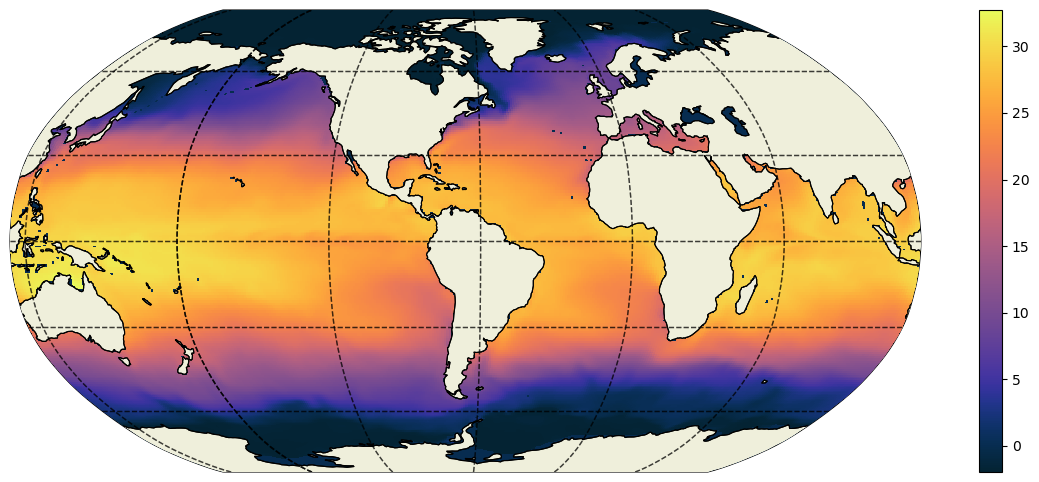

In [14]:
plt.figure(figsize=(15,6));
ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, t_array,
                              show_colorbar=True, cmap=cm.thermal,
                              user_lon_0=-66);